In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
df = pd.read_csv('reviews_dataset.csv')

In [3]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['ReviewContent'] = df['ReviewContent'].apply(remove_punctuation)

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df['ReviewContent'] = df['ReviewContent'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['ReviewContent'] = df['ReviewContent'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                        ProductTitle  \
0  Intel Core i3 12100F 12th Gen Generation Deskt...   
1  Intel Core i3 12100F 12th Gen Generation Deskt...   
2  Intel Core i3 12100F 12th Gen Generation Deskt...   
3  Intel Core i3 12100F 12th Gen Generation Deskt...   
4  Intel Core i3 12100F 12th Gen Generation Deskt...   

                                         ReviewTitle  \
0  This is the best you'll get in this price rang...   
1                                            Awesome   
2      Best in price when even compared to i5 10400f   
3                                               Good   
4                   Used or Unboxed product received   

                                       ReviewContent       Date  Rating  \
0  would building pc gaming slight editing coding...  25-Jun-23       5   
1  one best cpu budget looking gaming productivit...  16-Nov-22       5   
2  Got sale 726k Really enjoyed processor Heatsin...  15-Aug-22       5   
3                         

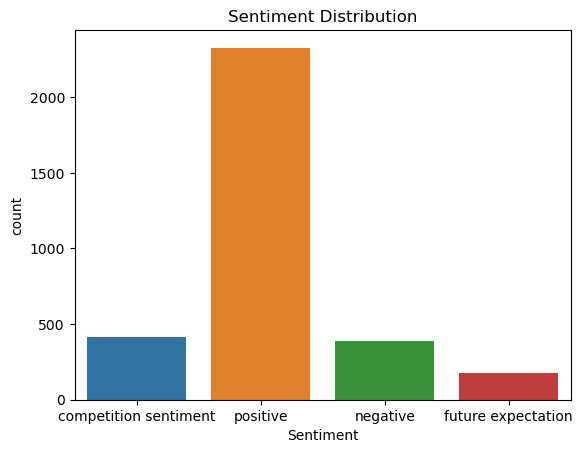

In [6]:
# Example: Print first few rows to check the cleaned data
print(df.head())

# Example: Visualize sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductTitle   3310 non-null   object
 1   ReviewTitle    3310 non-null   object
 2   ReviewContent  3310 non-null   object
 3   Date           3310 non-null   object
 4   Rating         3310 non-null   int64 
 5   Author         3310 non-null   object
 6   Country        3310 non-null   object
 7   Sentiment      3310 non-null   object
 8   Category       3310 non-null   object
 9   Generation     3310 non-null   object
dtypes: int64(1), object(9)
memory usage: 258.7+ KB


In [8]:
# Example: Count reviews by processor type
processor_counts = df['Category'].value_counts()
print("Processor Type Counts:")
print(processor_counts)

# Example: Count reviews by generation
generation_counts = df['Generation'].value_counts()
print("\nGeneration Counts:")
print(generation_counts)


Processor Type Counts:
Category
i5    1181
i7     898
i9     710
i3     521
Name: count, dtype: int64

Generation Counts:
Generation
13th    1510
12th    1231
14th     569
Name: count, dtype: int64


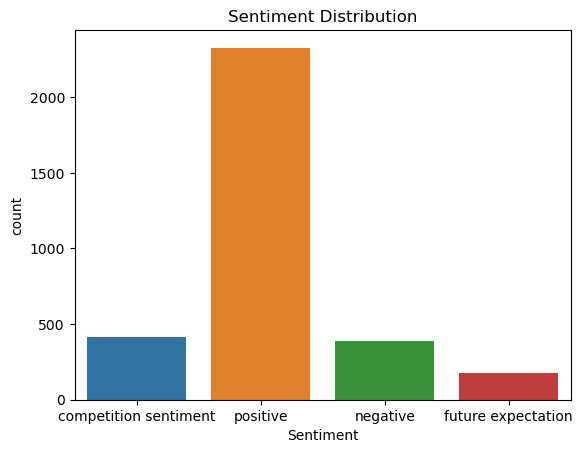

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

C:\Users\arjun\AppData\Local\Temp\ipykernel_8284\217781497.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


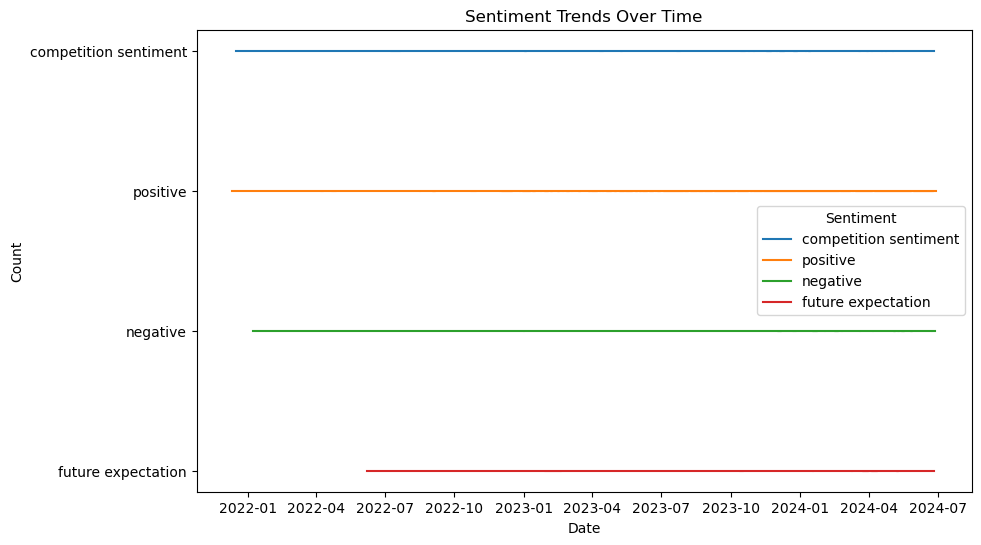

In [10]:
# Example: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Example: Plot sentiment trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sentiment', data=df, hue='Sentiment')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

Country-wise Review Counts:
Country
the United States     1100
France                 339
Italy                  333
Germany                324
India                  277
Canada                 190
the United Kingdom     176
Japan                  141
Spain                  126
Mexico                 110
Brazil                  83
Belgium                 35
Australia               25
Sweden                  23
Singapore               13
the Netherlands          9
Poland                   3
Saudi Arabia             3
Name: count, dtype: int64


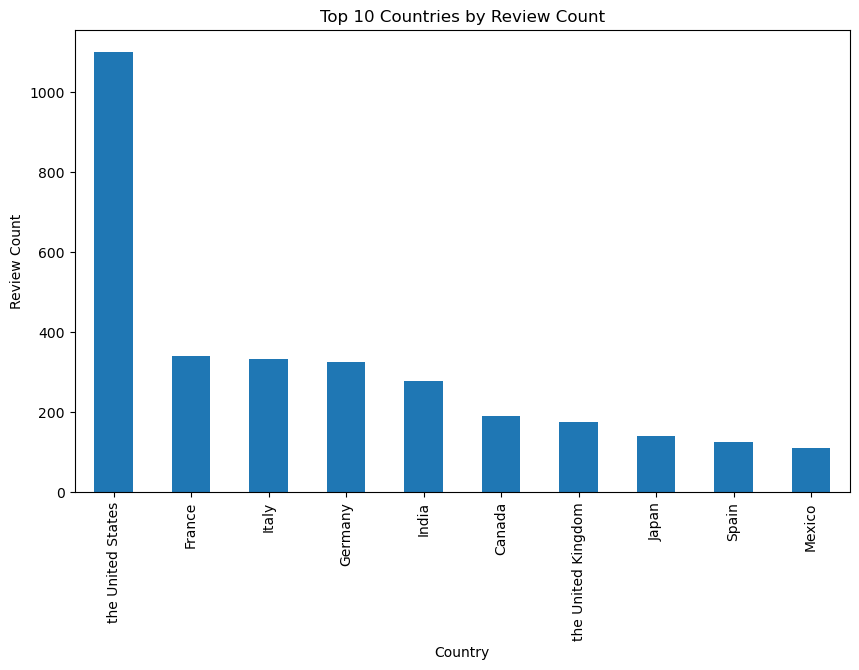

In [11]:
# Example: Count reviews by country
country_counts = df['Country'].value_counts()
print("Country-wise Review Counts:")
print(country_counts)

# Example: Visualize top countries by review count
top_countries = country_counts.head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Review Count')
plt.xlabel('Country')
plt.ylabel('Review Count')
plt.show()

C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


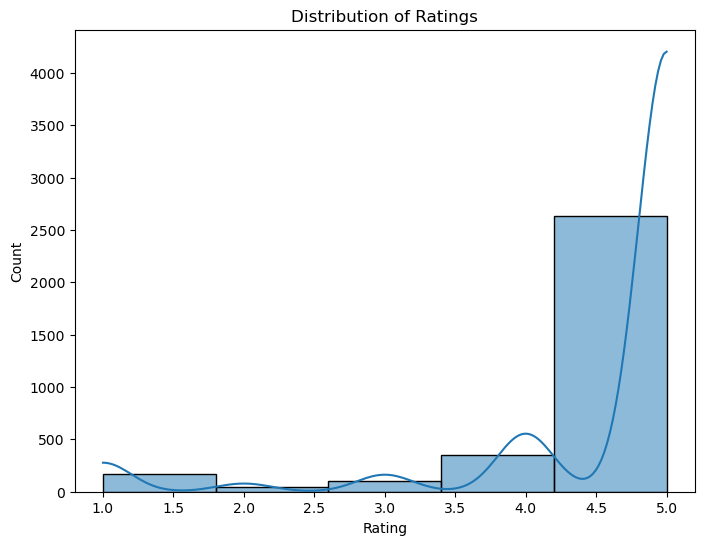

In [12]:
# Example: Visualize rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

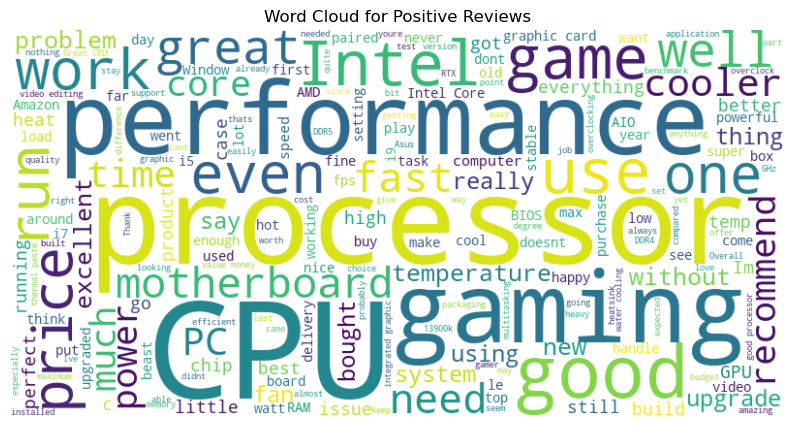

In [13]:
from wordcloud import WordCloud

# Example: Generate word cloud for positive reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['ReviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

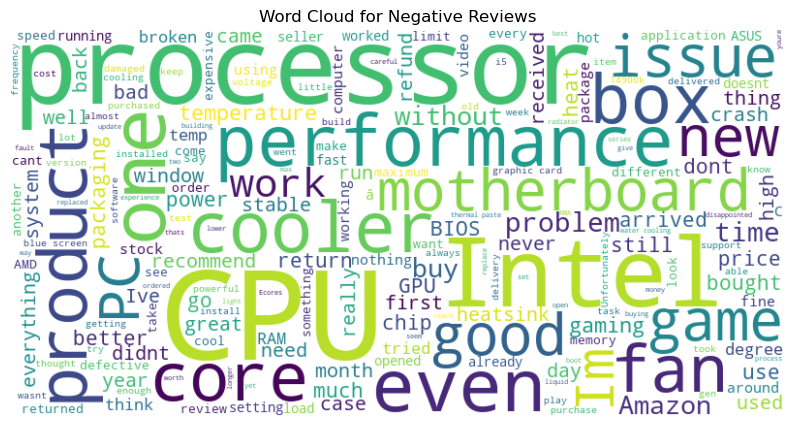

In [14]:
from wordcloud import WordCloud

# Example: Generate word cloud for negative reviews
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['ReviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

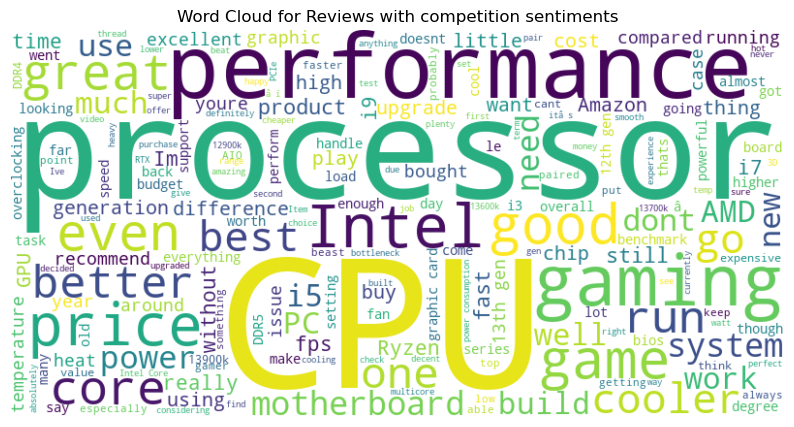

In [15]:
from wordcloud import WordCloud

# Example: Generate word cloud for competition reviews
competition_reviews = ' '.join(df[df['Sentiment'] == 'competition sentiment']['ReviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(competition_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Reviews with competition sentiments')
plt.axis('off')
plt.show()

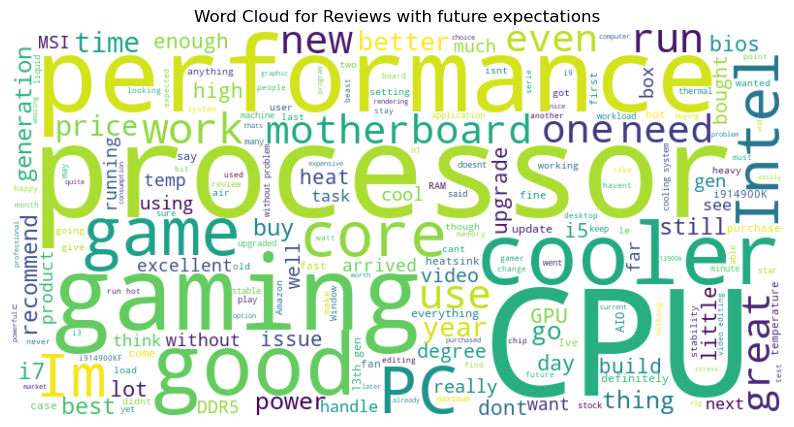

In [16]:
from wordcloud import WordCloud

# Example: Generate word cloud for positive reviews
future_expectation_reviews = ' '.join(df[df['Sentiment'] == 'future expectation']['ReviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(future_expectation_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Reviews with future expectations')
plt.axis('off')
plt.show()

C:\Users\arjun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


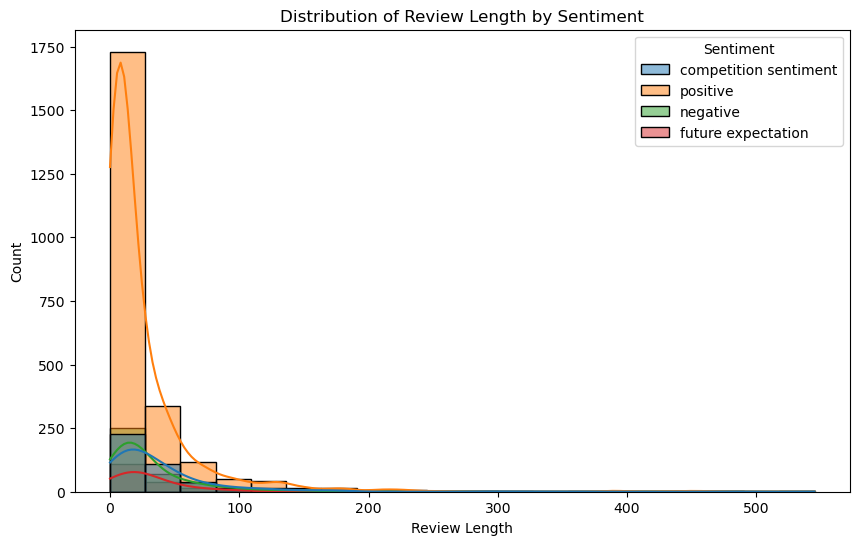

In [17]:
# Example: Calculate review lengths
df['ReviewLength'] = df['ReviewContent'].apply(lambda x: len(x.split()))

# Example: Visualize review length distribution by sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ReviewLength', hue='Sentiment', bins=20, kde=True)
plt.title('Distribution of Review Length by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

In [18]:
# Example: Perform topic modeling using LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Example dataset (replace with your actual data)
data = df['ReviewContent'].tolist()

# Create a CountVectorizer instance
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data)

# Fit LDA model on document-term matrix
num_topics = 5  # Number of topics to identify
lda = LDA(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Print top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-11:-1]  # Get indices of top 10 words
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(top_words)
    print()

Topic 1:
['good', 'cpu', 'cooler', 'processor', 'performance', 'cooling', 'temperature', 'heat', 'degree', 'power']

Topic 2:
['processor', 'cpu', 'graphic', 'intel', 'gaming', 'motherboard', 'card', 'price', 'use', 'i7']

Topic 3:
['cpu', 'product', 'work', 'good', 'intel', 'processor', 'box', 'time', 'pc', 'arrived']

Topic 4:
['performance', 'core', 'processor', 'gaming', 'intel', 'power', 'task', 'price', 'video', 'speed']

Topic 5:
['cpu', 'great', 'run', 'gaming', 'game', 'like', 'fast', 'issue', 'fps', 'paired']



In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the cleaned review content
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ReviewContent'])

# Optional: Print feature names (words)
print("Number of features (words):", len(tfidf_vectorizer.get_feature_names_out()))
print("Sample feature names:", tfidf_vectorizer.get_feature_names_out()[:10])

Number of features (words): 4417
Sample feature names: ['01' '0125v' '0198mhz' '01v' '03' '10' '100' '1000' '10000' '1000w']


In [20]:
from sklearn.preprocessing import LabelEncoder

# Example: Encode categorical variables
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])
df['Generation_encoded'] = label_encoder.fit_transform(df['Generation'])
df['Sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

In [21]:
from sklearn.model_selection import train_test_split

# Assuming 'tfidf_matrix' is your TF-IDF matrix and 'df['Sentiment_encoded']' is your encoded sentiment
X = tfidf_matrix
y = df['Sentiment_encoded']

# Split data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize SVM classifier with class_weight='balanced' for handling imbalanced data
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred = svm_model.predict(X_test)

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.45      0.32        83
           1       0.17      0.22      0.20        36
           2       0.43      0.51      0.47        78
           3       0.80      0.65      0.72       465

    accuracy                           0.58       662
   macro avg       0.41      0.46      0.42       662
weighted avg       0.66      0.58      0.61       662



In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'tfidf_matrix' is your TF-IDF matrix and 'df['Sentiment_encoded']' is your encoded sentiment
X = tfidf_matrix
y = df['Sentiment_encoded']

# Verify original class distribution
print("Original class distribution:")
print(np.bincount(y))

# Split data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify class distribution in training and test sets
print("Training class distribution:")
print(np.bincount(y_train))

print("Test class distribution:")
print(np.bincount(y_test))

Original class distribution:
[ 416  177  390 2327]
Training class distribution:
[ 333  141  312 1862]
Test class distribution:
[ 83  36  78 465]


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest classifier with class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Predict sentiment on the test set using the best estimator
y_pred_rf = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")

# Generate classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy (Random Forest): 0.72
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.43      0.14      0.22        83
           1       0.00      0.00      0.00        36
           2       0.58      0.42      0.49        78
           3       0.75      0.93      0.83       465

    accuracy                           0.72       662
   macro avg       0.44      0.37      0.38       662
weighted avg       0.65      0.72      0.67       662



In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the new class distribution after SMOTE
print("Resampled training class distribution:")
print(np.bincount(y_train_resampled))


Resampled training class distribution:
[1862 1862 1862 1862]


In [27]:
# Retrain the Random Forest model on the resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Predict sentiment on the test set using the best estimator
y_pred_rf_smote = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
print(f"Accuracy (Random Forest with SMOTE): {accuracy_rf_smote:.2f}")

# Generate classification report
print("Classification Report (Random Forest with SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))

Accuracy (Random Forest with SMOTE): 0.71
Classification Report (Random Forest with SMOTE):
              precision    recall  f1-score   support

           0       0.41      0.31      0.36        83
           1       0.00      0.00      0.00        36
           2       0.49      0.42      0.46        78
           3       0.78      0.88      0.83       465

    accuracy                           0.71       662
   macro avg       0.42      0.40      0.41       662
weighted avg       0.66      0.71      0.68       662



In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Initialize XGBoost classifier
xgb_model = XGBClassifier(scale_pos_weight=1, random_state=42)

# Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params_xgb = grid_search_xgb.best_params_
print(f"Best Parameters (XGBoost): {best_params_xgb}")

# Predict sentiment on the test set using the best estimator
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {accuracy_xgb:.2f}")

# Generate classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


C:\Users\arjun\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:12:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Accuracy (XGBoost): 0.73
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.52      0.14      0.23        83
           1       0.00      0.00      0.00        36
           2       0.62      0.33      0.43        78
           3       0.75      0.95      0.84       465

    accuracy                           0.73       662
   macro avg       0.47      0.36      0.37       662
weighted avg       0.66      0.73      0.67       662



In [30]:
from sklearn.utils import shuffle

# Assuming 'df' is your DataFrame with features and target
df = shuffle(df, random_state=42)


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the cleaned review content
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ReviewContent'])

# Optional: Print feature names (words)
print("Number of features (words):", len(tfidf_vectorizer.get_feature_names_out()))
print("Sample feature names:", tfidf_vectorizer.get_feature_names_out()[:10])

Number of features (words): 4417
Sample feature names: ['01' '0125v' '0198mhz' '01v' '03' '10' '100' '1000' '10000' '1000w']


In [34]:
from sklearn.model_selection import train_test_split

# Assuming 'tfidf_matrix' is your TF-IDF matrix and 'df['Sentiment_encoded']' is your encoded sentiment
X = tfidf_matrix
y = df['Sentiment_encoded']

# Split data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize SVM classifier with class_weight='balanced' for handling imbalanced data
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred = svm_model.predict(X_test)

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.45      0.35       125
           1       0.10      0.15      0.12        53
           2       0.44      0.48      0.46       117
           3       0.81      0.68      0.74       698

    accuracy                           0.60       993
   macro avg       0.41      0.44      0.42       993
weighted avg       0.66      0.60      0.62       993



In [40]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with 'ReviewContent' and 'Sentiment_encoded' columns

# Shuffle the dataset
df = shuffle(df, random_state=42)

# Prepare data for training
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['ReviewContent']).toarray()  # Convert to dense array
y = df['Sentiment_encoded']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame for LazyPredict
X_train_df = pd.DataFrame(X_train_smote, columns=vectorizer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test, columns=vectorizer.get_feature_names_out())

# Initialize LazyClassifier
clf = LazyClassifier(predictions=True)

# Fit and evaluate models
models_summary, predictions = clf.fit(X_train_df, X_test_df, y_train_smote, y_test)

print(models_summary)


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 30/31 [1:24:09<00:37, 37.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94869
[LightGBM] [Info] Number of data points in the train set: 7472, number of used features: 2323
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


100%|███████████████████████████████████████████████████████████████████████████████| 31/31 [1:24:21<00:00, 163.27s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.68               0.42    None      0.66   
NearestCentroid                    0.64               0.41    None      0.63   
XGBClassifier                      0.67               0.40    None      0.65   
ExtraTreesClassifier               0.68               0.40    None      0.65   
RandomForestClassifier             0.68               0.39    None      0.64   
LogisticRegression                 0.60               0.38    None      0.60   
LinearSVC                          0.57               0.38    None      0.59   
SGDClassifier                      0.65               0.38    None      0.63   
CalibratedClassifierCV             0.60               0.38    None      0.60   
PassiveAggressiveClassifier        0.58               0.38    None      0.59   
AdaBoostClassifier                 0.55 

In [41]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

In [42]:
# Split data into features and target
X = df['ReviewContent']
y = df['Sentiment_encoded']

# Stratified split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [43]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [44]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [45]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': [class_weights_dict]
}

svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'class_weight': {0: 1.9891826923076923, 1: 4.675141242937853, 2: 2.121794871794872, 3: 0.3556080790717662}, 'gamma': 'scale', 'kernel': 'rbf'}


In [46]:
# Predict on test data
y_pred = best_estimator.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.06      0.10       125
           1       0.11      0.02      0.03        53
           2       0.57      0.23      0.33       117
           3       0.72      0.94      0.82       698

    accuracy                           0.70       993
   macro avg       0.42      0.31      0.32       993
weighted avg       0.61      0.70      0.63       993



In [47]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=42)

In [48]:
X = df['ReviewContent']
y = df['Sentiment_encoded']

# Stratified split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [49]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [50]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [51]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': [class_weights_dict]
}

svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'class_weight': {0: 1.9891826923076923, 1: 4.675141242937853, 2: 2.121794871794872, 3: 0.3556080790717662}, 'gamma': 'scale', 'kernel': 'rbf'}


In [52]:
# Predict on test data
y_pred = best_estimator.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.33      0.37       125
           1       0.14      0.02      0.03        53
           2       0.57      0.34      0.43       117
           3       0.76      0.90      0.83       698

    accuracy                           0.71       993
   macro avg       0.48      0.40      0.41       993
weighted avg       0.67      0.71      0.68       993

